- Import necessary libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

- Load **train**, **test**, **valid** datasets

In [22]:
test = pd.read_csv('sms+spam+collection/test.csv')
train = pd.read_csv('sms+spam+collection/train.csv')
valid = pd.read_csv('sms+spam+collection/valid.csv')

X_test, y_test = test['processed_sms'],test['label'].map({'ham': 0, 'spam': 1})
X_train, y_train = train['processed_sms'],train['label'].map({'ham': 0, 'spam': 1})
X_valid, y_valid = valid['processed_sms'],valid['label'].map({'ham': 0, 'spam': 1})

# Remove rows with NaN values from X_train, X_valid, X_test
X_train = X_train.dropna()
y_train = y_train[X_train.index]  
X_valid = X_valid.dropna()
y_valid = y_valid[X_valid.index]  
X_test = X_test.dropna()
y_test = y_test[X_test.index]  

In [23]:
# Check for NaN values in the training, validation, and test datasets
print("NaN values in X_train:", X_train.isna().sum())
print("NaN values in y_train:", y_train.isna().sum())
print("NaN values in X_valid:", X_valid.isna().sum())
print("NaN values in y_valid:", y_valid.isna().sum())
print("NaN values in X_test:", X_test.isna().sum())
print("NaN values in y_test:", y_test.isna().sum())

NaN values in X_train: 0
NaN values in y_train: 0
NaN values in X_valid: 0
NaN values in y_valid: 0
NaN values in X_test: 0
NaN values in y_test: 0


In [18]:
X_test

0      heard u call rude chat private line cum wan c ...
1      decided people care stuff vote caring stuff lo...
2                          yeah jays sort fucking retard
3      never blame day ur life good days give u happi...
4                                         ok lor buy wat
                             ...                        
692                  cool ltgt inches long hope like big
693           actually im waiting weeks start putting ad
694                                           number sir
695    wake since checked stuff saw true available sp...
696                  cps causing outages conserve energy
Name: processed_sms, Length: 697, dtype: object

In [24]:
# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
# 5. Functions for Model Fitting, Scoring, Evaluation, Validation, and Hyperparameter Tuning

# Function to fit a model on training data
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Function to score a model on given data
def score_model(model, X, y):
    return accuracy_score(y, model.predict(X))

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, model_name):
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [28]:
# Function to evaluate the model predictions
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(classification_report(y, y_pred, target_names=['Ham', 'Spam']))
    cm = confusion_matrix(y, y_pred)
    plot_confusion_matrix(cm, ['Ham', 'Spam'], model_name=str(model))

In [29]:
# Function to validate the model (validation phase)
def validate_model(model, X_valid, y_valid):
    print(f"Validation Accuracy: {score_model(model, X_valid, y_valid):.4f}")
    evaluate_model(model, X_valid, y_valid)

In [30]:
# Function to fine-tune hyperparameters using GridSearchCV
def fine_tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [31]:
# 6. Models and Hyperparameter Tuning (if necessary)
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC()
}

In [32]:
# Hyperparameter tuning grid (for each model)
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, 20, None]},
    'Naive Bayes': {'alpha': [0.5, 1, 2]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

Training Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'C': 10}
Training Score for Logistic Regression: 0.9981
Validation Accuracy: 0.9727
Accuracy: 0.9727
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       603
        Spam       0.96      0.83      0.89        93

    accuracy                           0.97       696
   macro avg       0.97      0.91      0.94       696
weighted avg       0.97      0.97      0.97       696



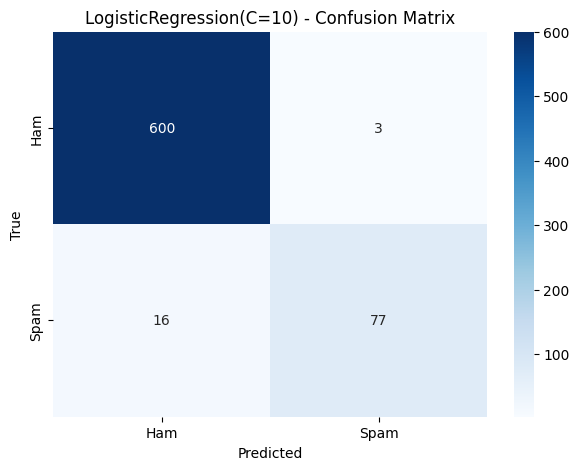

Evaluation on Training Data for Logistic Regression:
Accuracy: 0.9981
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      3616
        Spam       0.99      0.99      0.99       560

    accuracy                           1.00      4176
   macro avg       1.00      1.00      1.00      4176
weighted avg       1.00      1.00      1.00      4176



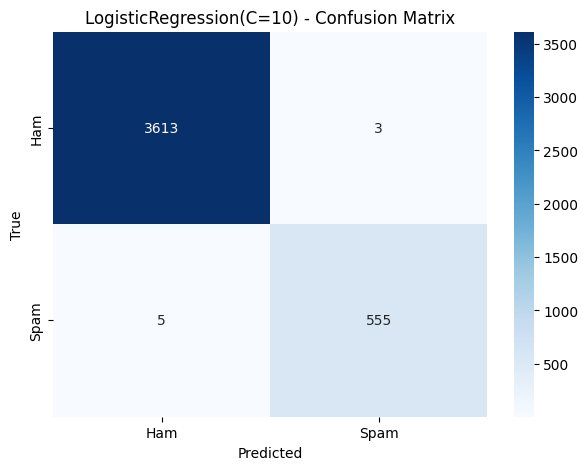

Evaluation on Validation Data for Logistic Regression:
Accuracy: 0.9727
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       603
        Spam       0.96      0.83      0.89        93

    accuracy                           0.97       696
   macro avg       0.97      0.91      0.94       696
weighted avg       0.97      0.97      0.97       696



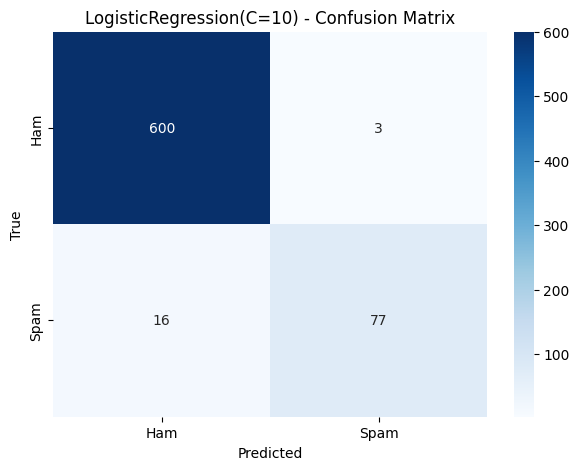

Training Random Forest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Training Score for Random Forest: 1.0000
Validation Accuracy: 0.9713
Accuracy: 0.9713
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       603
        Spam       0.96      0.82      0.88        93

    accuracy                           0.97       696
   macro avg       0.97      0.91      0.93       696
weighted avg       0.97      0.97      0.97       696



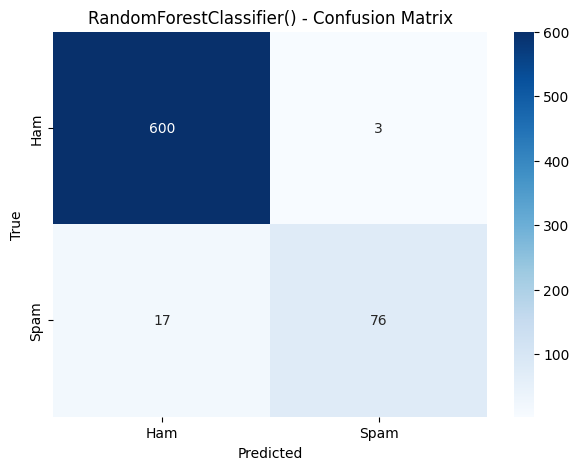

Evaluation on Training Data for Random Forest:
Accuracy: 1.0000
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      3616
        Spam       1.00      1.00      1.00       560

    accuracy                           1.00      4176
   macro avg       1.00      1.00      1.00      4176
weighted avg       1.00      1.00      1.00      4176



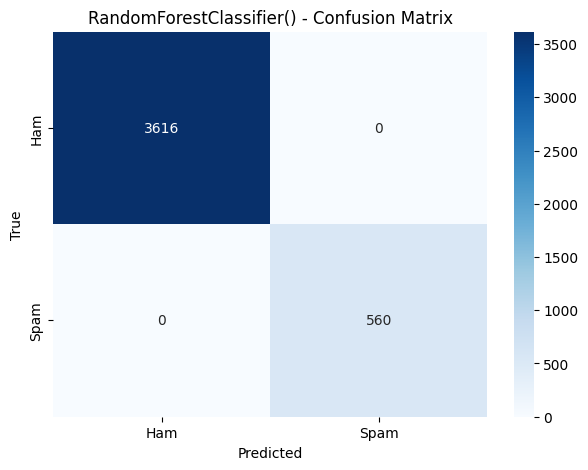

Evaluation on Validation Data for Random Forest:
Accuracy: 0.9713
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       603
        Spam       0.96      0.82      0.88        93

    accuracy                           0.97       696
   macro avg       0.97      0.91      0.93       696
weighted avg       0.97      0.97      0.97       696



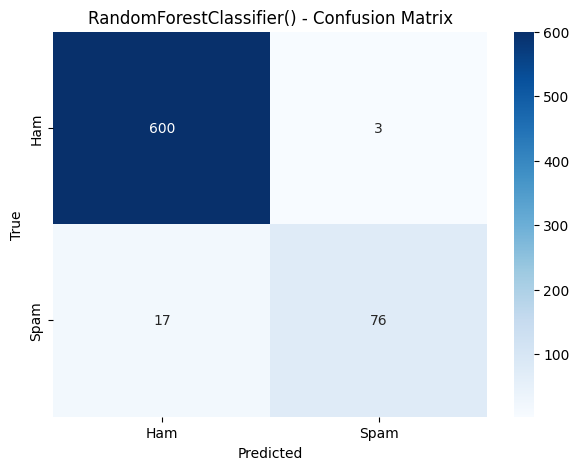

Training Naive Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 0.5}
Training Score for Naive Bayes: 0.9868
Validation Accuracy: 0.9770
Accuracy: 0.9770
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       603
        Spam       0.98      0.85      0.91        93

    accuracy                           0.98       696
   macro avg       0.98      0.92      0.95       696
weighted avg       0.98      0.98      0.98       696



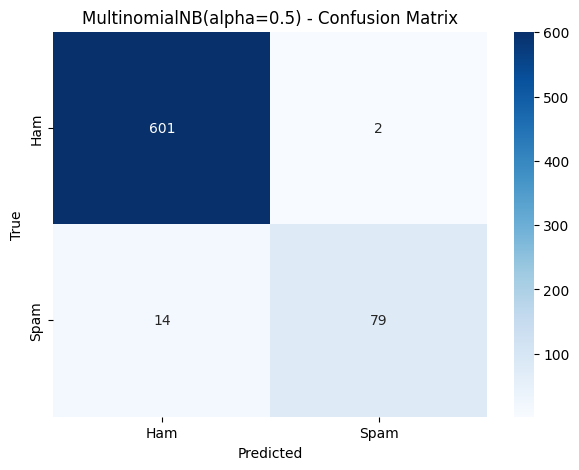

Evaluation on Training Data for Naive Bayes:
Accuracy: 0.9868
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      3616
        Spam       1.00      0.90      0.95       560

    accuracy                           0.99      4176
   macro avg       0.99      0.95      0.97      4176
weighted avg       0.99      0.99      0.99      4176



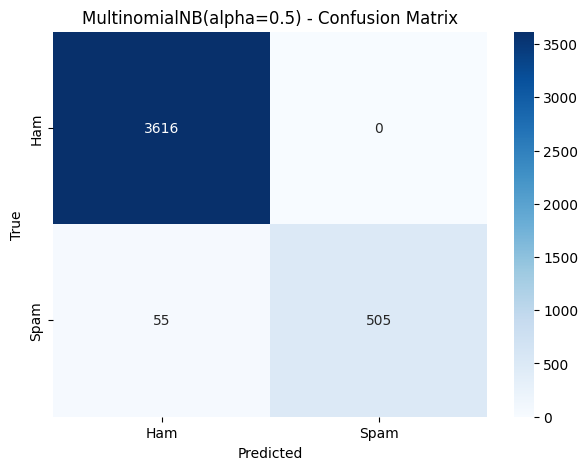

Evaluation on Validation Data for Naive Bayes:
Accuracy: 0.9770
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       603
        Spam       0.98      0.85      0.91        93

    accuracy                           0.98       696
   macro avg       0.98      0.92      0.95       696
weighted avg       0.98      0.98      0.98       696



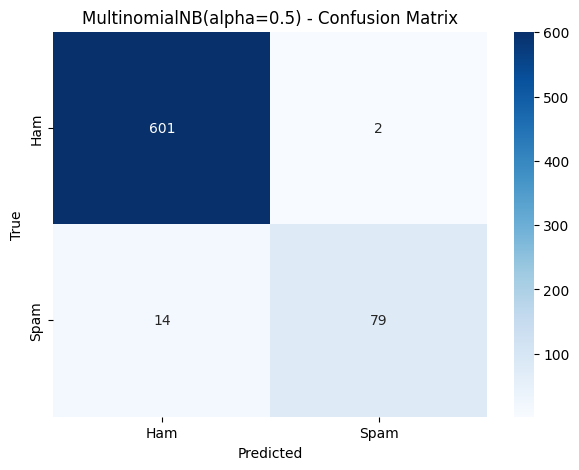

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'kernel': 'linear'}
Training Score for SVM: 0.9940
Validation Accuracy: 0.9799
Accuracy: 0.9799
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       603
        Spam       0.99      0.86      0.92        93

    accuracy                           0.98       696
   macro avg       0.98      0.93      0.95       696
weighted avg       0.98      0.98      0.98       696



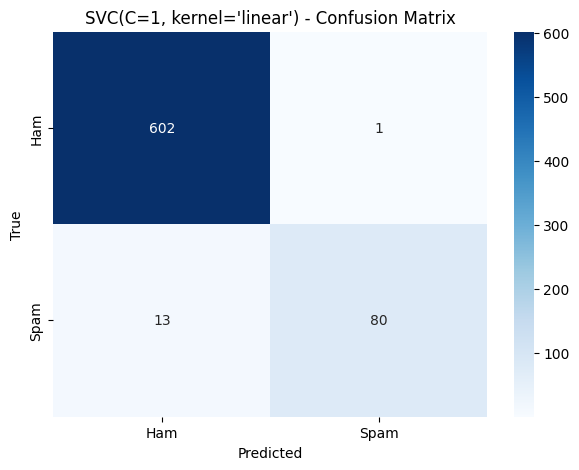

Evaluation on Training Data for SVM:
Accuracy: 0.9940
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00      3616
        Spam       1.00      0.96      0.98       560

    accuracy                           0.99      4176
   macro avg       0.99      0.98      0.99      4176
weighted avg       0.99      0.99      0.99      4176



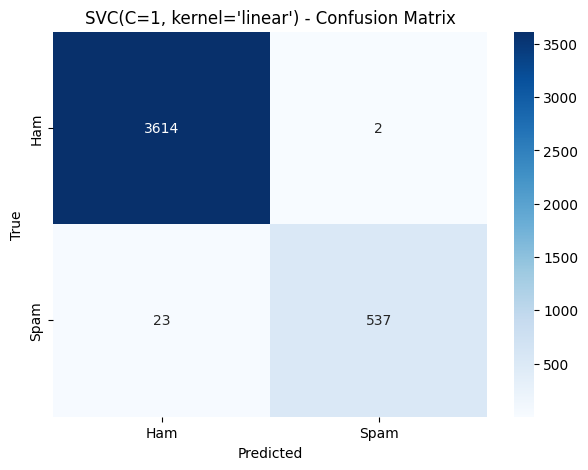

Evaluation on Validation Data for SVM:
Accuracy: 0.9799
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       603
        Spam       0.99      0.86      0.92        93

    accuracy                           0.98       696
   macro avg       0.98      0.93      0.95       696
weighted avg       0.98      0.98      0.98       696



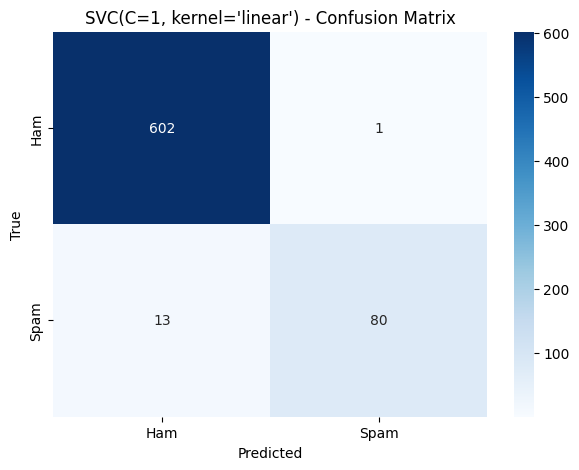

In [33]:
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Fine-tune model using GridSearchCV
    best_model = fine_tune_model(model, param_grid[model_name], X_train_tfidf, y_train)
    best_models[model_name] = best_model
    
    # Fit on training data
    fit_model(best_model, X_train_tfidf, y_train)
    
    # Score on train and validation data
    print(f"Training Score for {model_name}: {score_model(best_model, X_train_tfidf, y_train):.4f}")
    validate_model(best_model, X_test_tfidf, y_test)
    
    # Evaluate on train and validation data
    print(f"Evaluation on Training Data for {model_name}:")
    evaluate_model(best_model, X_train_tfidf, y_train)
    
    print(f"Evaluation on Validation Data for {model_name}:")
    evaluate_model(best_model, X_test_tfidf, y_test)

In [34]:
# 7. Score and select the best benchmark model based on test data
best_model_name = None
best_accuracy = 0
for model_name, model in best_models.items():
    accuracy = score_model(model, X_test_tfidf, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

In [35]:
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Best Model: SVM with Accuracy: 0.9799
